# Using  CoinMarketCap's public API in Python

 
 ## 1. Introduction
- *Public* **API**:

In general, an *API* is an application programming interface or piece of code that two softwares can use to communicate with each other. Using an API, one can *request** some information and the other can *respond* via the API.
Public APIs are used by companies to make their services available to the public.

- *On the importance of* **Cryptocurrencies**:

*Cryptocurrencies* are important because they hold the potential to revolutionize how we interact with the digital world. They could do away with central authorities and enable peer-to-peer transactions, which would bring about a new era of transparency and security.

Whether or not you decide to invest in cryptocurrencies is up to you, but it’s important that you stay informed about this technology and its potential implications. [California Business Journal](https://calbizjournal.com/why-is-crypto-so-important-and-should-i-care/#:~:text=Cryptocurrencies%20are%20important%20because%20they,era%20of%20transparency%20and%20security.)

- *We examine the price of the top 30 cryptocurrencies in the CoinMarketCap ranking over a 10-hour time frame at 5-minute intervals*.

CoinMarketCap is the world's most-referenced price-tracking website for cryptoassets in the rapidly growing cryptocurrency space. Its mission is to make crypto discoverable and efficient globally by empowering retail users with unbiased, high quality and accurate information for drawing their own informed conclusions. [CoinMarketCap](https://coinmarketcap.com/about/)


- *The tools we use here*:

Python, requests, Pandas, Matplolib, Seaborn, Plotly Express, datetime, and time.


Here are the steps we'll follow:



- First we start with the public API of CoinMarketCap.
- Using the public API, we extract all data for the top 30 cryptocurrencies on CoinMarketCap over a 10-hour time frame in 5-minute intervals.
- We store this information in a CSV file.
- For each digital currency, we generate a linear graph of price changes in this 10-hour time frame (120 records for each coin).
It is interesting to know which coins have a line chart similar to the Bitcoin line chart.
- And finally, we will see the percentage of price changes in 1 day, 7 days, 1 month, 60 days and 90 days.


#### Import the necessary libraries:

In [1]:
import pandas as pd

import time
from datetime import date 

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px  # to create  interactive charts

# sns.set(rc={"figure.figsize":(8, 5)})
import warnings
warnings.filterwarnings('ignore')

import plotly.io as pio
pio.renderers.default='notebook'

## 2. Extract data using the public API

### 2.1 Find the public API on CoinMarketCap:


First we need to find the public API. 

On https://coinmarketcap.com at the very end of this page:

1. Click on `Crypto API`
<div>
   <img src="https://imgur.com/ZN6T2FT.png" width="500" height="200">
</div>

    then you can generate your `API key` and
2. Click on `API DOCUMENTATION`
    then on section `Quick Start Guide`
3. Click on `View Quick Start Code Examples` and then choose `python`
    and copy the python code
 



<!--- ![](https://i.imgur.com/EneEygt.png=1x1) --->
<div>
   <img src="https://i.imgur.com/EneEygt.png" width="700" height="450">
</div>

### 2.2 Running API to get familiar with the data:

Copy and paste the API. Adjust the limit to 30 insted of 5000.

On https://coinmarketcap.com/api/ generate your API key and replace with the value of `'X-CMC_PRO_API_KEY'` in `headres` dictionary.


In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

# url = 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
 # 'limit':'5000',
   'limit': '30', 
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'XXXXXXXX-XXXX-XXXX-XXXX-XXXXXXXXXXXX', # copy & paste your API key from https://coinmarketcap.com/api/
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# We need to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10" into the Anaconda Prompt to change this to allow to pull data



{'status': {'timestamp': '2023-01-01T19:39:46.376Z', 'error_code': 0, 'error_message': None, 'elapsed': 39, 'credit_count': 1, 'notice': None, 'total_count': 8855}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9914, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [3]:
response.status_code  # ststus code 200 means everything is in order.
# response.json()

200

In [4]:
print(json.dumps(response.json(), indent = 4))

{
    "status": {
        "timestamp": "2023-01-01T19:39:46.376Z",
        "error_code": 0,
        "error_message": null,
        "elapsed": 39,
        "credit_count": 1,
        "notice": null,
        "total_count": 8855
    },
    "data": [
        {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "slug": "bitcoin",
            "num_market_pairs": 9914,
            "date_added": "2013-04-28T00:00:00.000Z",
            "tags": [
                "mineable",
                "pow",
                "sha-256",
                "store-of-value",
                "state-channel",
                "coinbase-ventures-portfolio",
                "three-arrows-capital-portfolio",
                "polychain-capital-portfolio",
                "binance-labs-portfolio",
                "blockchain-capital-portfolio",
                "boostvc-portfolio",
                "cms-holdings-portfolio",
                "dcg-portfolio",
                "dragonfly-

In [5]:
type(response.json())

dict

In [6]:
response.json().keys()

dict_keys(['status', 'data'])

In [7]:
# adjust the pandas dataframe to show all columns and rows
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [8]:
#This normalizes the data and makes it all pretty in a dataframe

pd.json_normalize(data['data'])

id              name symbol                  slug  num_market_pairs  \
0       1           Bitcoin    BTC               bitcoin              9914   
1    1027          Ethereum    ETH              ethereum              6327   
2     825            Tether   USDT                tether             45692   
3    3408          USD Coin   USDC              usd-coin              9358   
4    1839               BNB    BNB                   bnb              1164   
5      52               XRP    XRP                   xrp               871   
6    4687       Binance USD   BUSD           binance-usd              5940   
7      74          Dogecoin   DOGE              dogecoin               629   
8    2010           Cardano    ADA               cardano               624   
9    3890           Polygon  MATIC               polygon               564   
10   4943               Dai    DAI  multi-collateral-dai              1765   
11      2          Litecoin    LTC              litecoin               867   
12   1958              TRON    TRX                  tron               717   
13   6636          Polkadot    DOT          polkadot-new               453   
14   5994         Shiba Inu   SHIB             shiba-inu               473   
15   7083           Uniswap    UNI               uniswap               592   
16   5426            Solana    SOL                solana               415   
17   5805         Avalanche   AVAX             avalanche               357   
18   3957      UNUS SED LEO    LEO          unus-sed-leo                23   
19   3717   Wrapped Bitcoin   WBTC       wrapped-bitcoin               826   
20   1975         Chainlink   LINK             chainlink               938   
21  11419           Toncoin    TON               toncoin                76   
22   3794            Cosmos   ATOM                cosmos               381   
23    328            Monero    XMR                monero               202   
24   1321  Ethereum Classic    ETC      ethereum-classic               368   
25    512           Stellar    XLM               stellar               472   
26   1831      Bitcoin Cash    BCH          bitcoin-cash               667   
27   3897               OKB    OKB                   okb                84   
28   3635            Cronos    CRO                cronos               176   
29  18876           ApeCoin    APE           apecoin-ape               230   

                  date_added  \
0   2013-04-28T00:00:00.000Z   
1   2015-08-07T00:00:00.000Z   
2   2015-02-25T00:00:00.000Z   
3   2018-10-08T00:00:00.000Z   
4   2017-07-25T00:00:00.000Z   
5   2013-08-04T00:00:00.000Z   
6   2019-09-20T00:00:00.000Z   
7   2013-12-15T00:00:00.000Z   
8   2017-10-01T00:00:00.000Z   
9   2019-04-28T00:00:00.000Z   
10  2019-11-22T00:00:00.000Z   
11  2013-04-28T00:00:00.000Z   
12  2017-09-13T00:00:00.000Z   
13  2020-08-19T00:00:00.000Z   
14  2020-08-01T00:00:00.000Z   
15  2020-09-17T00:00:00.000Z   
16  2020-04-10T00:00:00.000Z   
17  2020-07-13T00:00:00.000Z   
18  2019-05-21T00:00:00.000Z   
19  2019-01-30T00:00:00.000Z   
20  2017-09-20T00:00:00.000Z   
21  2021-08-26T13:40:22.000Z   
22  2019-03-14T00:00:00.000Z   
23  2014-05-21T00:00:00.000Z   
24  2016-07-24T00:00:00.000Z   
25  2014-08-05T00:00:00.000Z   
26  2017-07-23T00:00:00.000Z   
27  2019-04-30T00:00:00.000Z   
28  2018-12-14T00:00:00.000Z   
29  2022-03-17T12:26:36.000Z   

                                                 tags    max_supply  \
0   [mineable, pow, sha-256, store-of-value, state...  2.100000e+07   
1   [pos, smart-contracts, ethereum-ecosystem, coi...           NaN   
2   [payments, stablecoin, asset-backed-stablecoin...           NaN   
3   [medium-of-exchange, stablecoin, asset-backed-...           NaN   
4   [marketplace, centralized-exchange, payments, ...  2.000000e+08   
5   [medium-of-exchange, enterprise-solutions, arr...  1.000000e+11   
6   [stablecoin, asset-backed-stablecoin, binance-...           NaN   
7   [mineable, pow, scrypt,

In [9]:
# set decimal format

pd.set_option('display.float_format', lambda x: '%.5f' % x) 

In [10]:
# drop 'tags' column & add a timestamp to each row:

coins_jsn_df = pd.json_normalize(data['data']).drop('tags', axis=1)
coins_jsn_df['time_extraction'] = pd.Timestamp.now().strftime("%H:%M")
coins_jsn_df

id              name symbol                  slug  num_market_pairs  \
0       1           Bitcoin    BTC               bitcoin              9914   
1    1027          Ethereum    ETH              ethereum              6327   
2     825            Tether   USDT                tether             45692   
3    3408          USD Coin   USDC              usd-coin              9358   
4    1839               BNB    BNB                   bnb              1164   
5      52               XRP    XRP                   xrp               871   
6    4687       Binance USD   BUSD           binance-usd              5940   
7      74          Dogecoin   DOGE              dogecoin               629   
8    2010           Cardano    ADA               cardano               624   
9    3890           Polygon  MATIC               polygon               564   
10   4943               Dai    DAI  multi-collateral-dai              1765   
11      2          Litecoin    LTC              litecoin               867   
12   1958              TRON    TRX                  tron               717   
13   6636          Polkadot    DOT          polkadot-new               453   
14   5994         Shiba Inu   SHIB             shiba-inu               473   
15   7083           Uniswap    UNI               uniswap               592   
16   5426            Solana    SOL                solana               415   
17   5805         Avalanche   AVAX             avalanche               357   
18   3957      UNUS SED LEO    LEO          unus-sed-leo                23   
19   3717   Wrapped Bitcoin   WBTC       wrapped-bitcoin               826   
20   1975         Chainlink   LINK             chainlink               938   
21  11419           Toncoin    TON               toncoin                76   
22   3794            Cosmos   ATOM                cosmos               381   
23    328            Monero    XMR                monero               202   
24   1321  Ethereum Classic    ETC      ethereum-classic               368   
25    512           Stellar    XLM               stellar               472   
26   1831      Bitcoin Cash    BCH          bitcoin-cash               667   
27   3897               OKB    OKB                   okb                84   
28   3635            Cronos    CRO                cronos               176   
29  18876           ApeCoin    APE           apecoin-ape               230   

                  date_added         max_supply    circulating_supply  \
0   2013-04-28T00:00:00.000Z     21000000.00000        19249400.00000   
1   2015-08-07T00:00:00.000Z                NaN       122373866.21780   
2   2015-02-25T00:00:00.000Z                NaN     66263713430.69676   
3   2018-10-08T00:00:00.000Z                NaN     44567531138.32863   
4   2017-07-25T00:00:00.000Z    200000000.00000       159964571.59697   
5   2013-08-04T00:00:00.000Z 100000000000.00000     50343500506.00000   
6   2019-09-20T00:00:00.000Z                NaN     16560434934.44406   
7   2013-12-15T00:00:00.000Z                NaN    132670764299.89409   
8   2017-10-01T00:00:00.000Z  45000000000.00000     34509612040.91000   
9   2019-04-28T00:00:00.000Z  10000000000.00000      8734317475.28493   
10  2019-11-22T00:00:00.000Z                NaN      5749529235.14888   
11  2013-04-28T00:00:00.000Z     84000000.00000        71959517.26576   
12  2017-09-13T00:00:00.000Z                NaN     91960646486.25792   
13  2020-08-19T00:00:00.000Z                NaN      1152053701.91126   
14  2020-08-01T00:00:00.000Z                NaN 549063278876301.93750   
15  2020-09-17T00:00:00.000Z   1000000000.00000       762209326.53550   
16  2020-04-10T00:00:00.000Z                NaN       367445128.32035   
17  2020-07-13T00:00:00.000Z    720000000.00000       311582142.74122   
18  2019-05-21T00:00:00.000Z                NaN       953954130.00000   
19  2019-01-30T00:00:00.000Z                NaN          183648.19136   
20  2017-09-20T00:00:00.000Z   1000000000.00000       5

### 2.3 Extract the data fro 10 hours and create a dataset:


Now, we can define a function to pull the data in every five minute for a 10-hour time frame.

In [11]:
def crypto():
    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      # print(data)
      print('Successfull runinng at: ', pd.Timestamp.now().strftime("%Y-%m-%d %H:%M"))
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df1 = pd.json_normalize(data['data']).drop('tags', axis=1)
    df1['time_extraction'] = pd.Timestamp.now().strftime("%H:%M")
    return df1

Run `crypto()` function in every 5 minutes fro 10 hours in a row:

In [ ]:
for i in range(120):
    time.sleep(300)
    
    df2 = crypto()
    coins_jsn_df= pd.concat([coins_jsn_df, df2], axis=0)
   

Successfull runinng at:  2022-12-29 06:05
Successfull runinng at:  2022-12-29 06:10
Successfull runinng at:  2022-12-29 06:15
Successfull runinng at:  2022-12-29 06:20
Successfull runinng at:  2022-12-29 06:25
Successfull runinng at:  2022-12-29 06:30
Successfull runinng at:  2022-12-29 06:35
Successfull runinng at:  2022-12-29 06:40
Successfull runinng at:  2022-12-29 06:45
Successfull runinng at:  2022-12-29 06:50
Successfull runinng at:  2022-12-29 06:55
Successfull runinng at:  2022-12-29 07:00
Successfull runinng at:  2022-12-29 07:05
Successfull runinng at:  2022-12-29 07:10
Successfull runinng at:  2022-12-29 07:15
Successfull runinng at:  2022-12-29 07:20
Successfull runinng at:  2022-12-29 07:25
Successfull runinng at:  2022-12-29 07:30
Successfull runinng at:  2022-12-29 07:35
Successfull runinng at:  2022-12-29 07:40
Successfull runinng at:  2022-12-29 07:45
Successfull runinng at:  2022-12-29 07:50
Successfull runinng at:  2022-12-29 07:55
Successfull runinng at:  2022-12-2

Save the new data as a `csv` file:

In [44]:
coins_jsn_df.to_csv('coinmarketcap.csv', index=None)

In [12]:
coins_df = pd.read_csv('coinmarketcap.csv')
coins_df_backup = coins_df.copy()

## 3. Exploratory data analysis

### 3.1 Data cleansing:

First, check `.shape` for this dataframe.

In [13]:
coins_df.shape

(3630, 35)

As you seen, this dataset has 35 cloumns and 3630 records. Also, we have some colums with missing values.

Create a dictionary a of  columns and the number of their missing values: 

In [14]:
miss_dic = {}
for clm in coins_df.columns.values:
    miss_cnt = coins_df[clm].isna().sum()
    if miss_cnt > 0:
        miss_dic[clm]= miss_cnt
miss_dic.pop('max_supply')  # We drop 'max_supply' to keep it for a chart to compare with 'total_supply'
miss_dic

{'platform': 3630,
 'self_reported_circulating_supply': 3267,
 'self_reported_market_cap': 3267,
 'tvl_ratio': 3509,
 'quote.USD.tvl': 3509,
 'platform.id': 2178,
 'platform.name': 2178,
 'platform.symbol': 2178,
 'platform.slug': 2178,
 'platform.token_address': 2178}

Our dataset has `3630` rows, so each of this uncomplete columns has more than half of its size missing valus. And also,
these columns are not too imortant for our analysis; thesfore, first we remove these colums.

In [15]:
coins_df = coins_df.drop(miss_dic.keys(), axis=1)
coins_df.tail(2)

id   name symbol   slug  num_market_pairs                date_added  \
3628  3897    OKB    OKB    okb                84  2019-04-30T00:00:00.000Z   
3629  3155  Quant    QNT  quant               133  2018-08-10T00:00:00.000Z   

         max_supply  circulating_supply    total_supply  cmc_rank  \
3628            NaN      60000000.00000 300000000.00000        29   
3629 14612493.00000      12072738.00000  14612493.08083        30   

                  last_updated  quote.USD.price  quote.USD.volume_24h  \
3628  2022-12-29T20:59:00.000Z         24.16664        14861728.99074   
3629  2022-12-29T20:59:00.000Z        110.40332        22232578.16660   

      quote.USD.volume_change_24h  quote.USD.percent_change_1h  \
3628                     -8.38090                     -0.06272   
3629                    -24.48040                     -0.27098   

      quote.USD.percent_change_24h  quote.USD.percent_change_7d  \
3628                       1.37828                     10.59872   
3629                      -0.10009                      5.70062   

      quote.USD.percent_change_30d  quote.USD.percent_change_60d  \
3628                      17.73162                      48.62026   
3629                      -2.70085                     -33.78284   

      quote.USD.percent_change_90d  quote.USD.market_cap  \
3628                      50.64814      1449998655.44966   
3629                     -21.47676      1332870325.14420   

      quote.USD.market_cap_dominance  quote.USD.fully_diluted_market_cap  \
3628                         0.18230                    7249993277.25000   
3629                         0.16760                    1613267702.49000   

        quote.USD.last_updated time_extraction  
3628  2022-12-29T20:59:00.000Z           16:01  
3629  2022-12-29T20:59:00.000Z           16:01

Now, we check `.info()`:

In [16]:
coins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  3630 non-null   int64  
 1   name                                3630 non-null   object 
 2   symbol                              3630 non-null   object 
 3   slug                                3630 non-null   object 
 4   num_market_pairs                    3630 non-null   int64  
 5   date_added                          3630 non-null   object 
 6   max_supply                          1815 non-null   float64
 7   circulating_supply                  3630 non-null   float64
 8   total_supply                        3630 non-null   float64
 9   cmc_rank                            3630 non-null   int64  
 10  last_updated                        3630 non-null   object 
 11  quote.USD.price                     3630 no

In [17]:
#coins_df['time_extraction'] = pd.to_datetime(coins_df['time_extraction'])

### 3.2 Data visualization:

#### 3.2.1 Similar behavior in dataset

We know that `Bitcoin` is the leader in the cryptocurrency market. We are interested in knowing
**which coins in our dataset have the highest correlation with Bitcoin.**

To answer this question visually, we first look at the line graph of the `Bitcoin` price in our dataset.

In [18]:
BTC_df = coins_df[coins_df['name']=='Bitcoin']
BTC_df.head(2)

id     name symbol     slug  num_market_pairs                date_added  \
0    1  Bitcoin    BTC  bitcoin              9914  2013-04-28T00:00:00.000Z   
30   1  Bitcoin    BTC  bitcoin              9914  2013-04-28T00:00:00.000Z   

       max_supply  circulating_supply   total_supply  cmc_rank  \
0  21000000.00000      19246181.00000 19246181.00000         1   
30 21000000.00000      19246181.00000 19246181.00000         1   

                last_updated  quote.USD.price  quote.USD.volume_24h  \
0   2022-12-29T10:58:00.000Z      16603.18771     16174744443.78768   
30  2022-12-29T11:03:00.000Z      16606.85861     16153321844.77576   

    quote.USD.volume_change_24h  quote.USD.percent_change_1h  \
0                      -3.41840                      0.02848   
30                     -3.47560                      0.07931   

    quote.USD.percent_change_24h  quote.USD.percent_change_7d  \
0                       -0.40336                     -1.39993   
30                      -0.38568                     -1.38212   

    quote.USD.percent_change_30d  quote.USD.percent_change_60d  \
0                        0.55292                     -19.79471   
30                       0.59857                     -19.77026   

    quote.USD.percent_change_90d  quote.USD.market_cap  \
0                      -14.74813    319547955794.10736   
30                     -14.76456    319618606626.64923   

    quote.USD.market_cap_dominance  quote.USD.fully_diluted_market_cap  \
0                         40.05010                  348666941855.96002   
30                        40.05830                  348744030785.09998   

      quote.USD.last_updated time_extraction  
0   2022-12-29T10:58:00.000Z           06:00  
30  2022-12-29T11:03:00.000Z           06:05

In [19]:
px.line(BTC_df, x='time_extraction', y='quote.USD.price', width=800, height=500,
             title = 'BTC price changes in 10 hours')
fig.show("png")


    
<div>
   <img src="https://imgur.com/qdCoEuu.png" width="900" height="600">
</div>    

And now we can see the line graph for all 30 coins in our dataset.

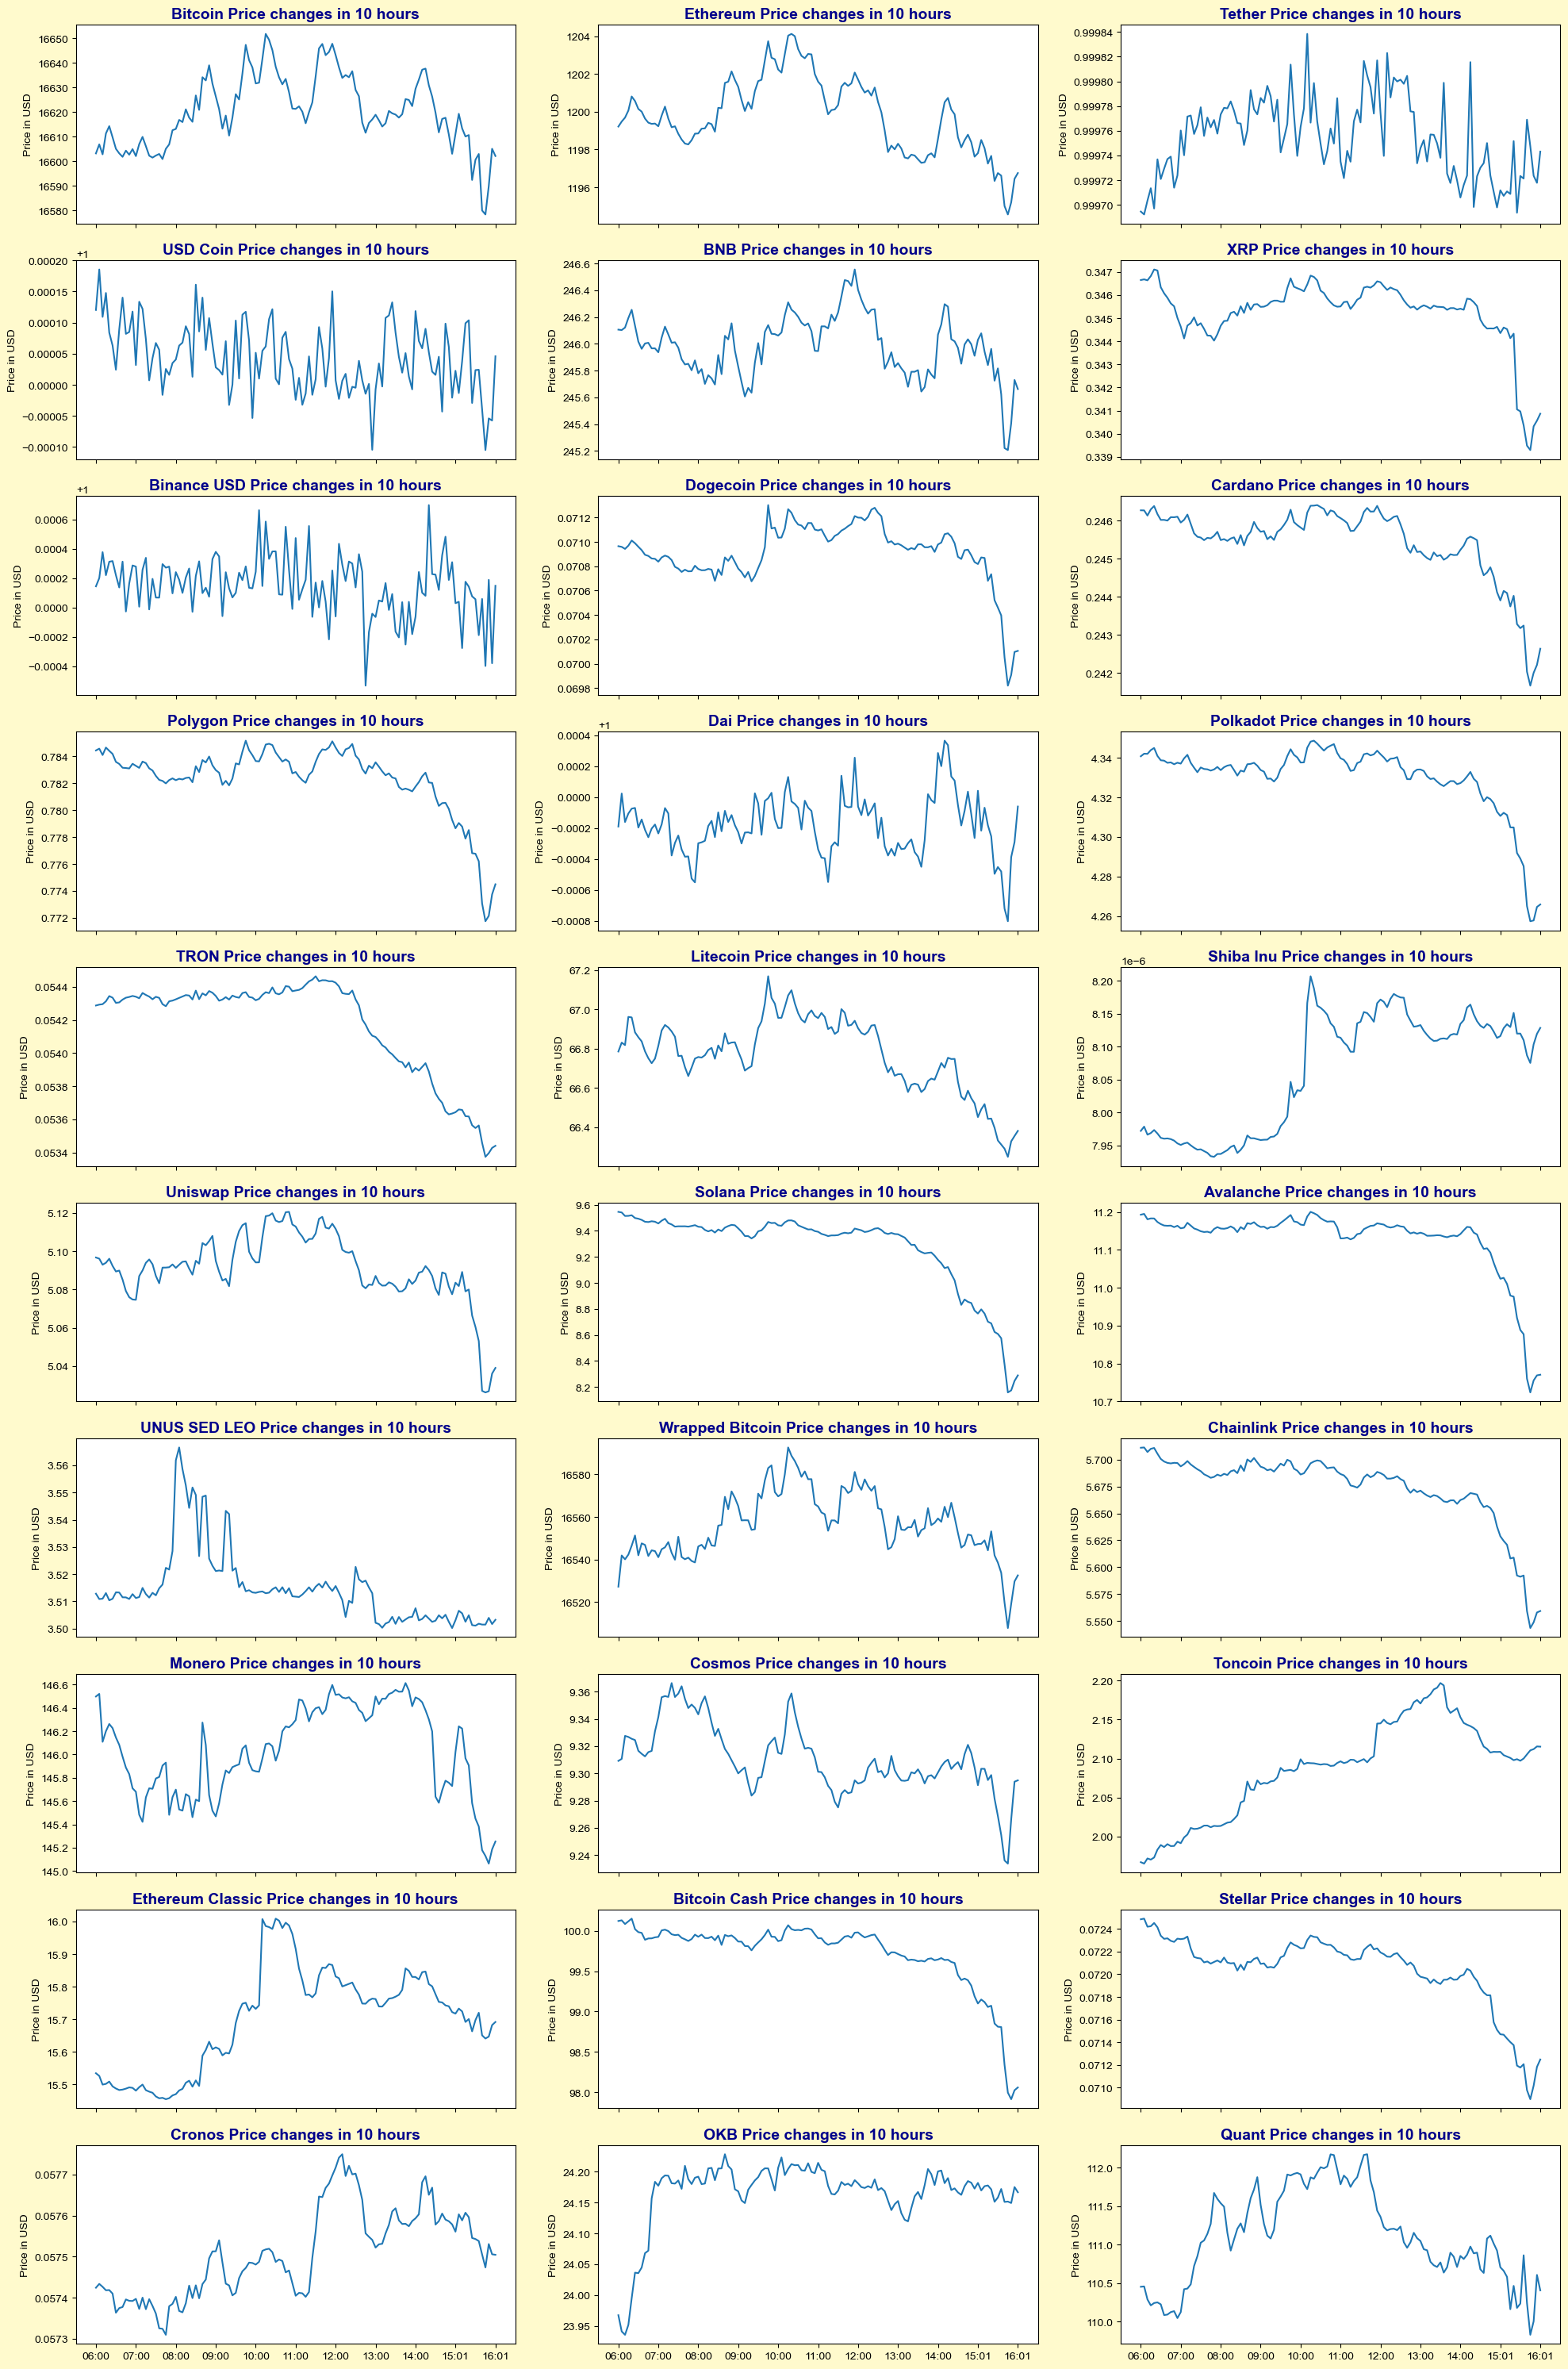

In [20]:
fig, axes = plt.subplots(10, 3 , figsize=(20, 30), sharex=True)
fig.patch.set_facecolor('lemonchiffon')

for i in range(10):
    for j in range(3):
        
        name = coins_df['name'][3*i+j]
        df = coins_df[coins_df['name'] == name]
        fig = sns.lineplot(data=df, x= df['time_extraction'], y = df['quote.USD.price'],
                           ax=axes[i,j] )
        
        # set title
        fig.set_title(name+' Price changes in 10 hours',fontdict= { 'fontsize': 14, 'fontweight':'bold'}, color='darkblue')
        #set axis
        fig.set_xticks( df['time_extraction'][0::12])
        fig.set(xlabel= None)
        fig.set(ylabel = "Price in USD")
        plt.tight_layout()
    
sns.set(font_scale = 0.8)

As you can see above, most of the coins like `Ethereum`, `BNB`, `Dogecoin`, and  `Cosmos` are performing similar to `Bitcoin` in our 10-hour time frame.


#### 3.2.2 Percentage price change:

In this dataset, we have percentage price changes for 1-hour, 1-day, 1-week, 1-month, 2-month, and 3-month periods.
It is interesting to see the line graph of these changes.

Note that this is how you see **which coins have better price volatility**.

For this purpose, it is better to average each of them.

In [21]:
# Columns containig the price changes
prc_changes = ['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
              'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']

# make average for each coins and each column in prc_change
# and create a dataframe
df_prc_avg= coins_df.groupby('name', sort=False)[prc_changes].mean()

# select short name for our column
new_columns = { x: x[25:] for x in prc_changes}
# rename our column in the new dataframe
df_prc_avg = df_prc_avg.rename(columns = new_columns )
df_prc_avg.head()

1h      24h       7d       30d       60d       90d
name                                                             
Bitcoin   0.00256 -0.20672 -0.61518   1.11830 -19.67051 -15.23067
Ethereum -0.01546  0.28287 -0.16510  -1.04538 -24.66699 -10.67311
Tether    0.00017 -0.00400 -0.02749   0.00211  -0.04806  -0.03092
USD Coin -0.00093 -0.00091  0.00676  -0.00927   0.00614   0.00288
BNB      -0.00970  0.94021  1.20766 -17.80903 -21.26373 -13.86081

We need to reshape the dataframe in such a way, all the columns are placed in only one column and the corresponding values in the next column.

In [22]:
df_prc_avg_stck  = df_prc_avg.stack()

df_prc_avg_stck

name                 
Bitcoin           1h      0.00256
                  24h    -0.20672
                  7d     -0.61518
                  30d     1.11830
                  60d   -19.67051
                  90d   -15.23067
Ethereum          1h     -0.01546
                  24h     0.28287
                  7d     -0.16510
                  30d    -1.04538
                  60d   -24.66699
                  90d   -10.67311
Tether            1h      0.00017
                  24h    -0.00400
                  7d     -0.02749
                  30d     0.00211
                  60d    -0.04806
                  90d    -0.03092
USD Coin          1h     -0.00093
                  24h    -0.00091
                  7d      0.00676
                  30d    -0.00927
                  60d     0.00614
                  90d     0.00288
BNB               1h     -0.00970
                  24h     0.94021
                  7d      1.20766
                  30d   -17.80903
                  60d   -2

`df_prc_avg_stck` is a pandas series and needs to be converted back to a dataframe.

In [23]:
df_prc_avg_stck = df_prc_avg_stck.to_frame(name = 'Average of percent_change')

df_prc_avg_stck

Average of percent_change
name                                           
Bitcoin          1h                     0.00256
                 24h                   -0.20672
                 7d                    -0.61518
                 30d                    1.11830
                 60d                  -19.67051
                 90d                  -15.23067
Ethereum         1h                    -0.01546
                 24h                    0.28287
                 7d                    -0.16510
                 30d                   -1.04538
                 60d                  -24.66699
                 90d                  -10.67311
Tether           1h                     0.00017
                 24h                   -0.00400
                 7d                    -0.02749
                 30d                    0.00211
                 60d                   -0.04806
                 90d                   -0.03092
USD Coin         1h                    -0.00093
                 24h                   -0.00091
                 7d                     0.00676
                 30d                   -0.00927
                 60d                    0.00614
                 90d                    0.00288
BNB              1h                    -0.00970
                 24h                    0.94021
                 7d                     1.20766
                 30d                  -17.80903
                 60d                  -21.26373
                 90d                  -13.86081
XRP              1h                    -0.12700
                 24h                   -3.76760
                 7d                     0.13840
                 30d                  -12.06556
                 60d                  -25.36705
                 90d                  -28.25219
Binance USD      1h                    -0.00298
                 24h                    0.00585
                 7d                     0.00612
                 30d                   -0.02179
                 60d                    0.00838
                 90d                    0.01930
Dogecoin         1h                    -0.05761
                 24h                   -0.56381
                 7d                    -6.09755
                 30d                  -30.41265
                 60d                  -40.54823
                 90d                   17.09953
Cardano          1h                    -0.10155
                 24h                   -2.62336
                 7d                    -2.41113
                 30d                  -20.59110
                 60d                  -39.88192
                 90d                  -43.45837
Polygon          1h                    -0.09632
                 24h                   -0.41147
                 7d                    -0.11186
                 30d                   -6.40269
                 60d                  -14.52308
                 90d                    0.65791
Dai              1h                    -0.00274
                 24h                    0.00856
                 7d                     0.01672
                 30d                   -0.00260
                 60d                    0.01263
                 90d                    0.00756
Polkadot         1h                    -0.11292
                 24h                   -0.14311
                 7d                    -2.24338
                 30d                  -18.10223
                 60d                  -34.32766
                 90d                  -32.46321
TRON             1h                    -0.12889
                 24h                    0.01741
                 7d                    -1.59921
                 30d                    1.01332
                 60d                  -14.89430
                 90d                  -11.86682
Litecoin         1h                    -0.02421
                 24h                   -0.94550
                 7d                     2.05738
                 30d                  

And now, reseting the index of this dataframe:

In [24]:
index = pd.Index(range(df_prc_avg_stck.count()[0]))

df_prc_avg_stck = df_prc_avg_stck.reset_index()
df_prc_avg_stck

name level_1  Average of percent_change
0             Bitcoin      1h                    0.00256
1             Bitcoin     24h                   -0.20672
2             Bitcoin      7d                   -0.61518
3             Bitcoin     30d                    1.11830
4             Bitcoin     60d                  -19.67051
5             Bitcoin     90d                  -15.23067
6            Ethereum      1h                   -0.01546
7            Ethereum     24h                    0.28287
8            Ethereum      7d                   -0.16510
9            Ethereum     30d                   -1.04538
10           Ethereum     60d                  -24.66699
11           Ethereum     90d                  -10.67311
12             Tether      1h                    0.00017
13             Tether     24h                   -0.00400
14             Tether      7d                   -0.02749
15             Tether     30d                    0.00211
16             Tether     60d                   -0.04806
17             Tether     90d                   -0.03092
18           USD Coin      1h                   -0.00093
19           USD Coin     24h                   -0.00091
20           USD Coin      7d                    0.00676
21           USD Coin     30d                   -0.00927
22           USD Coin     60d                    0.00614
23           USD Coin     90d                    0.00288
24                BNB      1h                   -0.00970
25                BNB     24h                    0.94021
26                BNB      7d                    1.20766
27                BNB     30d                  -17.80903
28                BNB     60d                  -21.26373
29                BNB     90d                  -13.86081
30                XRP      1h                   -0.12700
31                XRP     24h                   -3.76760
32                XRP      7d                    0.13840
33                XRP     30d                  -12.06556
34                XRP     60d                  -25.36705
35                XRP     90d                  -28.25219
36        Binance USD      1h                   -0.00298
37        Binance USD     24h                    0.00585
38        Binance USD      7d                    0.00612
39        Binance USD     30d                   -0.02179
40        Binance USD     60d                    0.00838
41        Binance USD     90d                    0.01930
42           Dogecoin      1h                   -0.05761
43           Dogecoin     24h                   -0.56381
44           Dogecoin      7d                   -6.09755
45           Dogecoin     30d                  -30.41265
46           Dogecoin     60d                  -40.54823
47           Dogecoin     90d                   17.09953
48            Cardano      1h                   -0.10155
49            Cardano     24h                   -2.62336
50            Cardano      7d                   -2.41113
51            Cardano     30d                  -20.59110
52            Cardano     60d                  -39.88192
53            Cardano     90d                  -43.45837
54            Polygon      1h                   -0.09632
55            Polygon     24h                   -0.41147
56            Polygon      7d                   -0.11186
57            Polygon     30d                   -6.40269
58            Polygon     60d                  -14.52308
59            Polygon     90d                    0.65791
60                Dai      1h                   -0.00274
61                Dai     24h                    0.00856
62                Dai      7d                    0.01672
63                Dai     30d                   -0.00260
64                Dai     60d                    0.01263
65                Dai     90d                    0.00756
66           Polkadot      1h                   -0.11292
67           Polkadot     24h                   -0.14311
68           Polkadot      7d                   -2.24338
69           Polkadot     3

And finally, the dataset is ready for visualization.

In [25]:
df_prc_avg_stck = df_prc_avg_stck.rename(columns = {'level_1': 'Time Frame'} )
df_prc_avg_stck.head()

name Time Frame  Average of percent_change
0  Bitcoin         1h                    0.00256
1  Bitcoin        24h                   -0.20672
2  Bitcoin         7d                   -0.61518
3  Bitcoin        30d                    1.11830
4  Bitcoin        60d                  -19.67051

In [26]:
px.line(df_prc_avg_stck, x='Time Frame', y='Average of percent_change',
        color='name', markers='mean', 
        title = "Percentage price changes in 90 days")
fig.show("png")


    
<div>
   <img src="https://imgur.com/nB3sBwb.png" width="950" height="600">
</div>    

`Toncoin` and `OKB` had the most positive price changes in the last 3 months and `Solana` had the most losses in the last 3 months.

With the help of the interactive legend of this chart, if we only hold `Bitcoin` and `Ethereum`, on 60 days we will see a big loss for these two market leaders.


</br>

</br>

<div>
   <img src="https://i.imgur.com/Y61horS.png" width="500" height="200">
</div>

#### 3.2.3 max_supply vs total_supply:

According to CoinMarketCap:

- `total_supply` is  the amount of coins that have been already created, minus any coins that have been burned. It is analogous to the outstanding shares in the stock market.

- `max-suppy` is the maximum amount of coins that will ever exist in the lifetime of the cryptocurrency. It is analogous to the fully diluted shares in the stock market.

In the following, we first consider a comparison between max_supply and total_supply for coins with a maximum total_supply of 300 million dollars.
And later we see the total_supply value for coins up to 1 billion dollars.


In [27]:
# create a dataframe of total_supply and max_supply by taking of maximum of them for each coin
df_supply= coins_df.groupby('symbol', sort=False)[['total_supply', 'max_supply']].max()
index = pd.Index(range(df_supply.count()[0]))
df_supply = df_supply.reset_index()
df_supply

symbol          total_supply         max_supply
0     BTC        19246600.00000     21000000.00000
1     ETH       122373866.21780                NaN
2    USDT     73141766321.23428                NaN
3    USDC     44669982962.12631                NaN
4     BNB       159979963.59043    200000000.00000
5     XRP     99989184828.00000 100000000000.00000
6    BUSD     17023476648.26406                NaN
7    DOGE    132670764299.89407                NaN
8     ADA     35303937971.93400  45000000000.00000
9   MATIC     10000000000.00000  10000000000.00000
10    DAI      5780781660.51799                NaN
11    DOT      1267536001.40776                NaN
12    TRX     91975255377.39088                NaN
13    LTC        84000000.00000     84000000.00000
14   SHIB 589735030408322.75000                NaN
15    UNI      1000000000.00000   1000000000.00000
16    SOL       537261152.95131                NaN
17   AVAX       416988132.74122    720000000.00000
18    LEO       985239504.00000                NaN
19   WBTC          184004.67236                NaN
20   LINK      1000000000.00000   1000000000.00000
21    XMR        18220102.03650                NaN
22   ATOM               0.00000                NaN
23    TON      5047558528.00000   5000000000.00000
24    ETC       210700000.00000    210700000.00000
25    BCH        19269375.00000     21000000.00000
26    XLM     50001787512.60938  50001806812.00000
27    CRO     30263013692.00000  30263013692.00000
28    OKB       300000000.00000                NaN
29    QNT        14612493.08083     14612493.00000

Now we select coins with total_supply between $\$1M$ and $\$300M$.

In [28]:
# select coins with total_supply between $1M and $300M

selected_coins =  df_supply[df_supply['total_supply'].between(1000000, 300000000)]['symbol']

In [29]:
# get the corresponding values of max_supply and total_supply for selected_coins

max_supply_values = df_supply[df_supply['total_supply'].between(1000000, 300000000)]['max_supply']
total_supply_values = df_supply[df_supply['total_supply'].between(1000000, 300000000)]['total_supply']

In [30]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='max_supply', x=selected_coins, y=max_supply_values),
    go.Bar(name='total_supply', x=selected_coins, y=total_supply_values)
])
# Change the bar mode
fig.update_layout(barmode='group', height=500, width=900, title = "max_supply vs total_supply up to $300M")
fig.show()



<div>
   <img src="https://imgur.com/sQLtvxl.png" width="950" height="600">
</div>    

#### 3.2.4 Treemap of total_supply up to $\$1B$:

In this section, we have a treemap of total_supply for coins with at most $\$1B$ total_supply.

In [31]:
df_TS_1B = coins_df[coins_df["total_supply"] < 1000000000]
colors = ["hotpink", "royalblue", "lawngreen", "lightgray", "firebrick", "gold",  "blueviolet","lightblue","fuchsia", "mediumturquoise",
                     "cyan","lemonchiffon" ,"darksalmon", "lightgreen"]

In [32]:
fig = px.treemap(df_TS_1B, path=["symbol"], values='total_supply',
                 width=750, height=320,
                hover_data=['max_supply'])
fig.update_layout(
    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=50, l=25, r=25, b=25),
    title = "total_supply up to $1B")
fig.show()

<div>
   <img src="https://imgur.com/hTR9ydC.png" width="750" height="500">
</div>    

# 4. References and Feuture works

### Summary 
In this project,

- we extract data from CoinMarketCap.com using the public API.
- We then collected data every five minute for 10 consecutive hours for the top 30 cryptocurrencies in the CoinMarketCap rankings.
- Then we had some data cleaning.

- After that, we considered the line charts of the coin prices and found out which coins behave similarly to Bitcoin as the leader of cryptocurrency market.
- Then we saw the graph of percentage change in price up to 90 days.
- Also, we visualized the max_supply and total_supply features.



### Idea for feuture works

- Create a cryptocurrency convertor.

- For further data analysis, mine data from many coins over a longer time period than what we have here.


### References to links we found useful

- https://coinmarketcap.com/
- https://www.youtube.com/watch?v=2HfSFdPEFRg
- https://jovian.ai/aakashns-6l3/scraping-github-topics-repositories
